In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

cols=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
#load dataset
pima=pd.read_csv("pima-indians-diabetes.csv",header=None,names=cols)
feature_cols=['pregnant','glucose','bp','insulin','bmi','pedigree','age']
X=pima[feature_cols] #features
Y=pima.label #target


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=108)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier(criterion="gini",max_depth=3,splitter='best') #gini=selection  criteria depth=max depth of the d.tree splitter=

regressor = regressor.fit(x_train , y_train)
regressor
print('The model has ran Successfully!')

The model has ran Successfully!


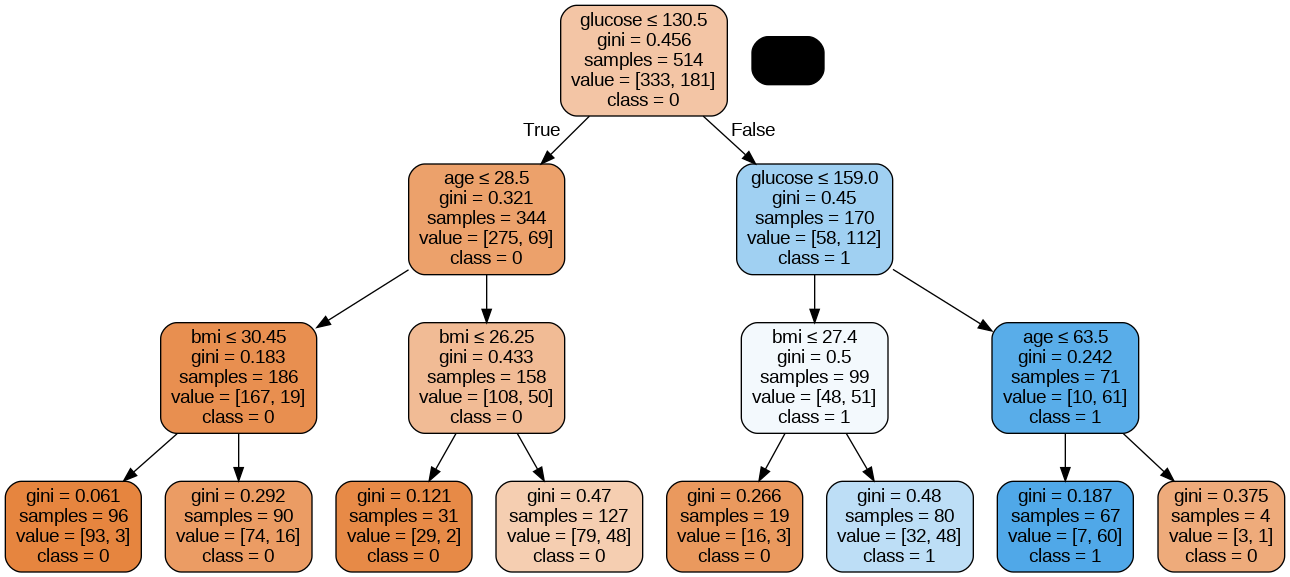

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True,
                feature_names=feature_cols,class_names=['0','1']) #regression=treemodel,filled takes care of colours rounded means round boxes
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("ml-1.png")
Image(graph.create_png())

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=x_train,y=y_train,cv=30)
accuracies

array([0.77777778, 0.66666667, 0.77777778, 0.66666667, 0.70588235,
       0.76470588, 0.70588235, 0.70588235, 0.70588235, 0.76470588,
       0.64705882, 0.88235294, 0.76470588, 0.76470588, 0.70588235,
       0.82352941, 0.52941176, 0.70588235, 0.82352941, 0.76470588,
       0.82352941, 0.70588235, 0.58823529, 0.76470588, 0.70588235,
       0.88235294, 0.64705882, 0.58823529, 0.82352941, 0.58823529])

In [ ]:
accuracies.mean()

0.7257080610021788

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define the scoring functions
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation with cv=5
cv_results = cross_validate(regressor, x_train, y_train, cv=5, scoring=scoring)

# Extract and print the results
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1_score']

print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("F1 Scores:", f1_scores)

avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()
avg_f1 = f1_scores.mean()

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)

Precision Scores: [0.64285714 0.73684211 0.67647059 0.71428571 0.63888889]
Recall Scores: [0.25       0.38888889 0.63888889 0.54054054 0.63888889]
F1 Scores: [0.36       0.50909091 0.65714286 0.61538462 0.63888889]
Average Precision: 0.6818688879060397
Average Recall: 0.4914414414414415
Average F1 Score: 0.5561014541014541
